In [2]:
import numpy as np
import math
import torch
from mpl_toolkits.mplot3d import Axes3D
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt



AttributeError: partially initialized module 'torch' has no attribute 'version' (most likely due to a circular import)

In [4]:
import torch

AttributeError: partially initialized module 'torch' has no attribute 'version' (most likely due to a circular import)

In [3]:
torch.cuda.is_available()

NameError: name 'torch' is not defined

In [3]:
class GenericNetwork(nn.Module):

    def __init__(self, layers,activation):

        super(GenericNetwork, self).__init__()
        self.layers = nn.ModuleList()

        for i in range(len(layers) - 1):
            self.layers.append(nn.Linear(layers[i], layers[i + 1]))

        self.activation = activation

    def forward(self, x):

        for i in range(len(self.layers) - 1):
            x = self.activation(self.layers[i](x))

        x = self.layers[-1](x)
        
        return x
    

In [16]:
model = GenericNetwork([2,10,1],nn.ReLU()).to(device)


In [17]:
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.05)

In [5]:
device=torch.device("cuda")

In [10]:
def generatePoints(num_samples):  
    x1 = torch.linspace(-5, 5, num_samples)  
    x2 = torch.linspace(-5, 5, num_samples)  
    X1, X2 = torch.meshgrid(x1, x2)  
    Y = torch.sin(X1)*torch.cos(X2)

    
    x = torch.cat([X1.contiguous().view(-1,1), X2.contiguous().view(-1,1)], dim=1) 
    y = Y.view(-1, 1)  
    return x.to(device),y.to(device)


In [18]:
epochs = 100000

for epoch in range(epochs):
    model.train()
    y_pred = model(x)
    
    loss = criterion(y_pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 100/100000, Loss: 0.18981336057186127
Epoch 200/100000, Loss: 0.09383189678192139
Epoch 300/100000, Loss: 0.06375699490308762
Epoch 400/100000, Loss: 0.058489006012678146
Epoch 500/100000, Loss: 0.04098028317093849
Epoch 600/100000, Loss: 0.023649968206882477
Epoch 700/100000, Loss: 0.023354243487119675
Epoch 800/100000, Loss: 0.028603026643395424
Epoch 900/100000, Loss: 0.023214804008603096
Epoch 1000/100000, Loss: 0.023196334019303322
Epoch 1100/100000, Loss: 0.02535727061331272
Epoch 1200/100000, Loss: 0.023600416257977486
Epoch 1300/100000, Loss: 0.028013641014695168
Epoch 1400/100000, Loss: 0.023085536435246468
Epoch 1500/100000, Loss: 0.023137127980589867
Epoch 1600/100000, Loss: 0.023033298552036285
Epoch 1700/100000, Loss: 0.023020928725600243
Epoch 1800/100000, Loss: 0.026213781908154488
Epoch 1900/100000, Loss: 0.025308843702077866
Epoch 2000/100000, Loss: 0.0229499414563179
Epoch 2100/100000, Loss: 0.023159349337220192
Epoch 2200/100000, Loss: 0.022923968732357025
Epoc

KeyboardInterrupt: 

In [5]:
x1 = torch.linspace(-3, 3, 50)  # 100 points in x
x2 = torch.linspace(-3, 3, 50)  # 100 points in y
X1, X2 = torch.meshgrid(x1, x2)  # Create a grid of points
Y = torch.exp(-(X1**2 + X2**2))  # Gaussian function: e^(-(x^2 + y^2))

# Reshape the input data for the neural network
x = torch.cat([X1.contiguous().view(-1,1), X2.contiguous().view(-1,1)], dim=1)  # Shape: (10000, 2)
y = Y.view(-1, 1)  # Shape: (10000, 1)


C:\Users\jmlig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [13]:
print(torch.cuda.get_device_name(0)) 

NVIDIA GeForce GTX 1060 6GB


In [11]:
x,y=generatePoints(100)

C:\Users\jmlig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


C:\Users\jmlig\AppData\Local\Temp\ipykernel_13944\3992609516.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xnp=np.array(xnp.T[0])


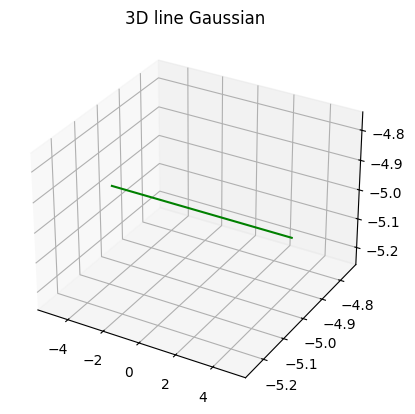

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

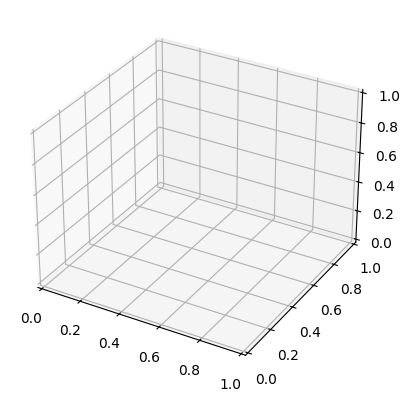

In [25]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
xnp=x.to("cpu")
ynp=y.to("cpu")
xnp=np.array(xnp.T[0])
ynp=np.array(xnp.T[1])
znp=np.array(ynp.T)

ax.plot3D(xnp,ynp,znp, 'green')


ax.set_title('3D line Gaussian')
plt.show()
fig = plt.figure()
 
# syntax for 3-D projection
ax2= plt.axes(projection ='3d')
xnp=np.array(xnp.T[0])
ynp=np.array(xnp.T[1])
ax2.plot3D(xnp,ynp,model(x).detach().T[0],"red",alpha=0.2)


ax.set_title('3D line NN')
plt.show()
